In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


1. Import Libraries

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
# Load dataset
df = pd.read_csv('loan_data.csv')  # replace with your file name

# Quick overview
print(df.head())
print(df.info())
print(df.isnull().sum())  # Check for missing values


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df[' loan_status']

,loan_status
0,Approved
1,Rejected
2,Rejected
3,Rejected
4,Rejected
...,...
4264,Rejected
4265,Approved
4266,Rejected
4267,Approved


3. Analysis the dataset

/tmp/ipython-input-7-3640445806.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[' income_annum'], bins=50, kde=True ,  palette='pastel')


<Axes: xlabel=' income_annum', ylabel='Count'>

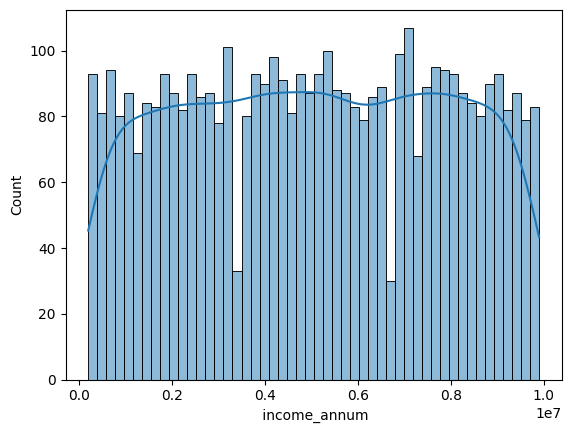

In [7]:
sns.histplot(df[' income_annum'], bins=50, kde=True ,  palette='pastel')

/tmp/ipython-input-8-3430427940.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[' loan_amount'], bins=40, kde=True , palette='pastel')


<Axes: xlabel=' loan_amount', ylabel='Count'>

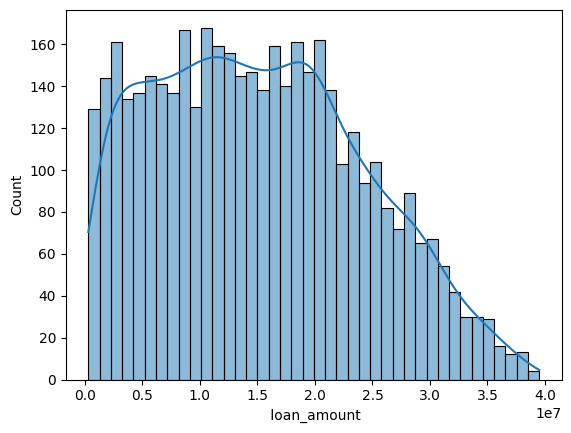

In [8]:
sns.histplot(df[' loan_amount'], bins=40, kde=True , palette='pastel')

/tmp/ipython-input-9-1002997754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=' education', palette='pastel')


<Axes: xlabel=' education', ylabel='count'>

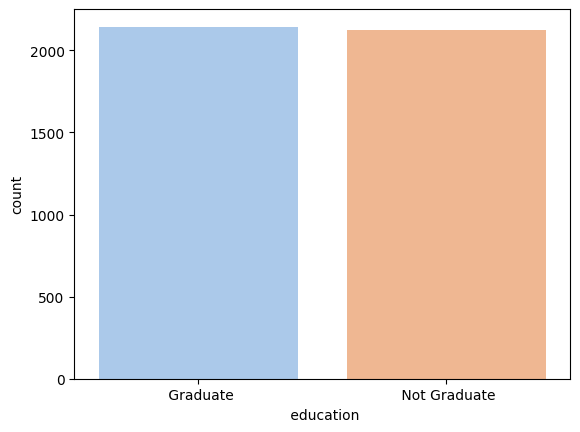

In [9]:
sns.countplot(data=df, x=' education', palette='pastel')

<Axes: xlabel=' education', ylabel='count'>

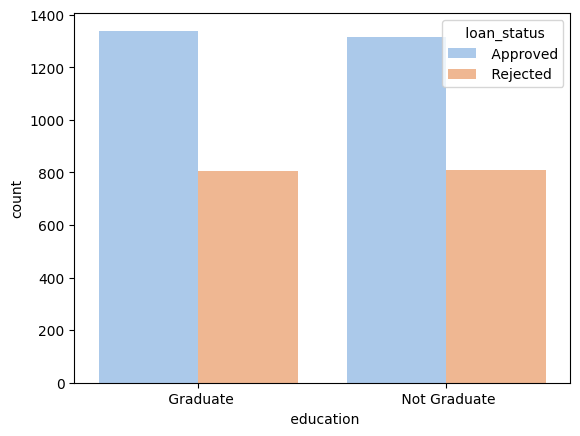

In [10]:
sns.countplot(data=df, x=' education', hue=' loan_status', palette='pastel')

<Axes: xlabel=' no_of_dependents', ylabel='count'>

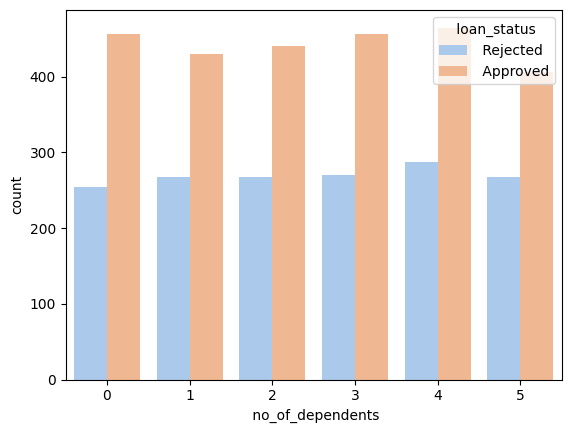

In [11]:
sns.countplot(data=df, x=' no_of_dependents', hue=' loan_status', palette='pastel')

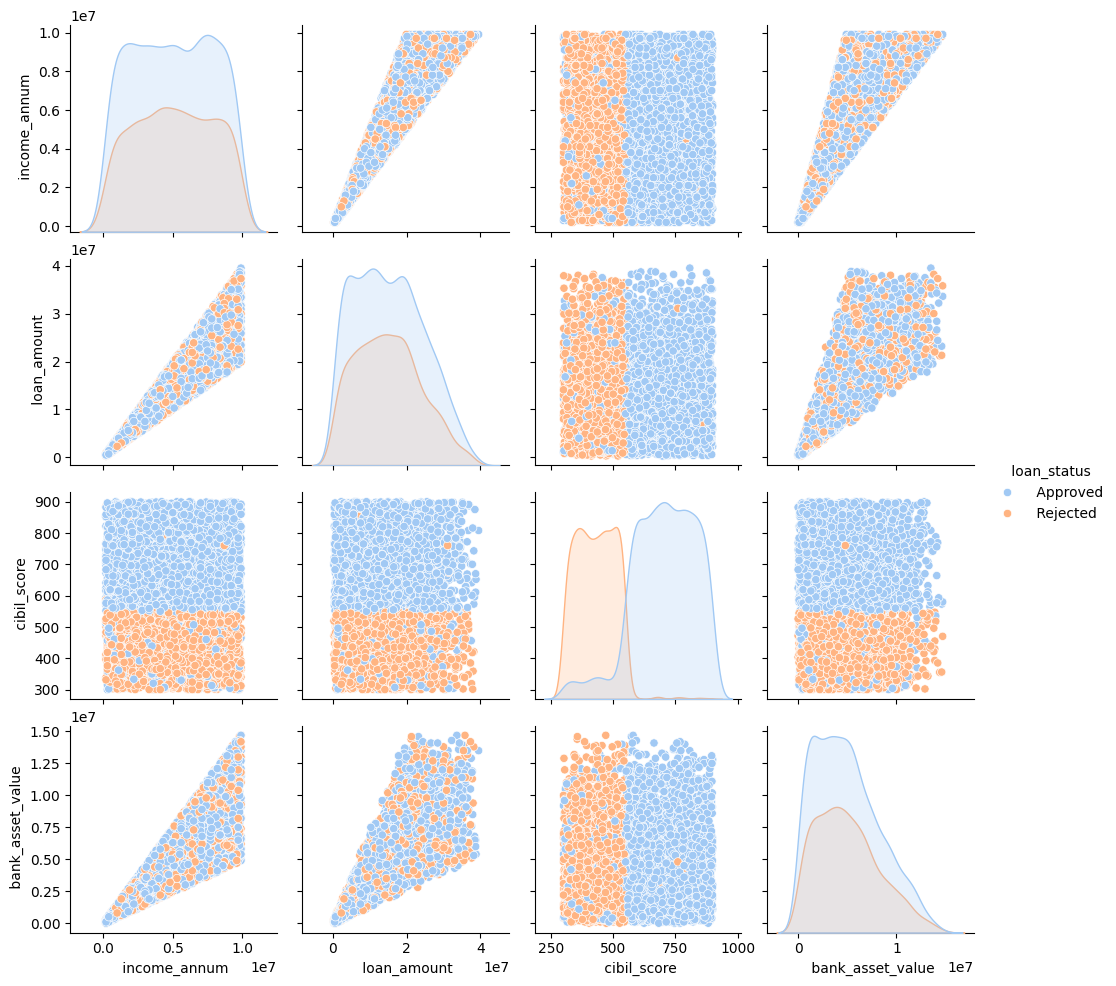

In [12]:
selected_vars = [' income_annum', ' loan_amount', ' cibil_score', ' bank_asset_value']
sns.pairplot(df, vars=selected_vars, hue=' loan_status', palette='pastel')

([<matplotlib.patches.Wedge at 0x7cbc10cd7410>,
 [Text(-1.019983051562082, -0.411867180685841, ' Approved'),
  Text(1.0199830155555043, 0.41186726985559335, ' Rejected')],
 [Text(-0.5563543917611357, -0.22465482582864052, '62.2%'),
  Text(0.5563543721211841, 0.22465487446668725, '37.8%')])

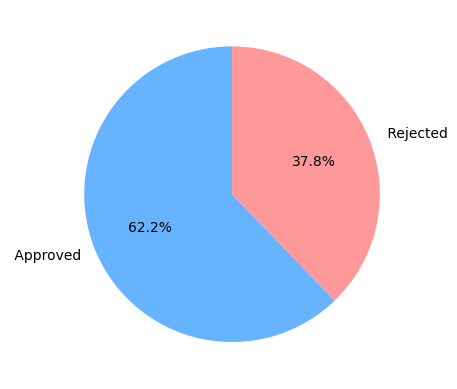

In [13]:
loan_counts = df[' loan_status'].value_counts()
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])

4. Data Preprocessing

In [14]:
df_copy = df.copy()

label = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = label.fit_transform(df_copy[col])

correlation_matrix = df_copy.corr()

/tmp/ipython-input-15-104416857.py:6: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


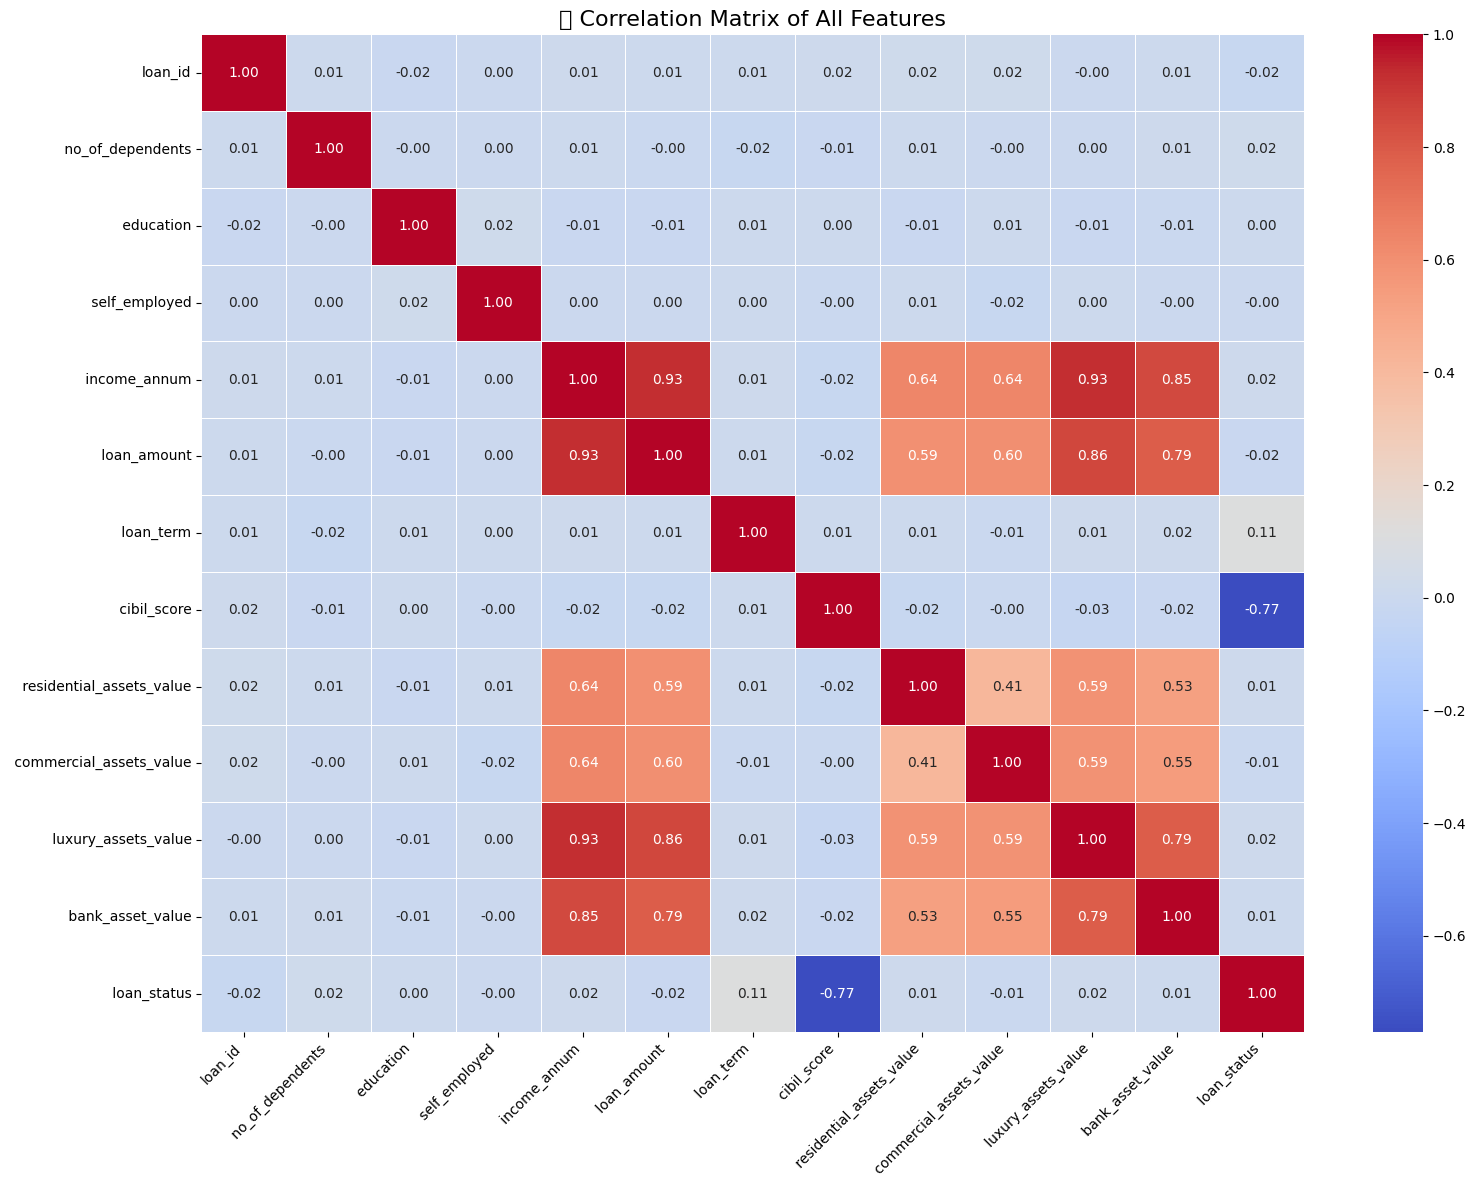

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('🔍 Correlation Matrix of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
df.replace(['NaN', 'nan', 'None', ''], pd.NA, inplace=True)

In [17]:
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [18]:
df.duplicated().sum()

np.int64(0)

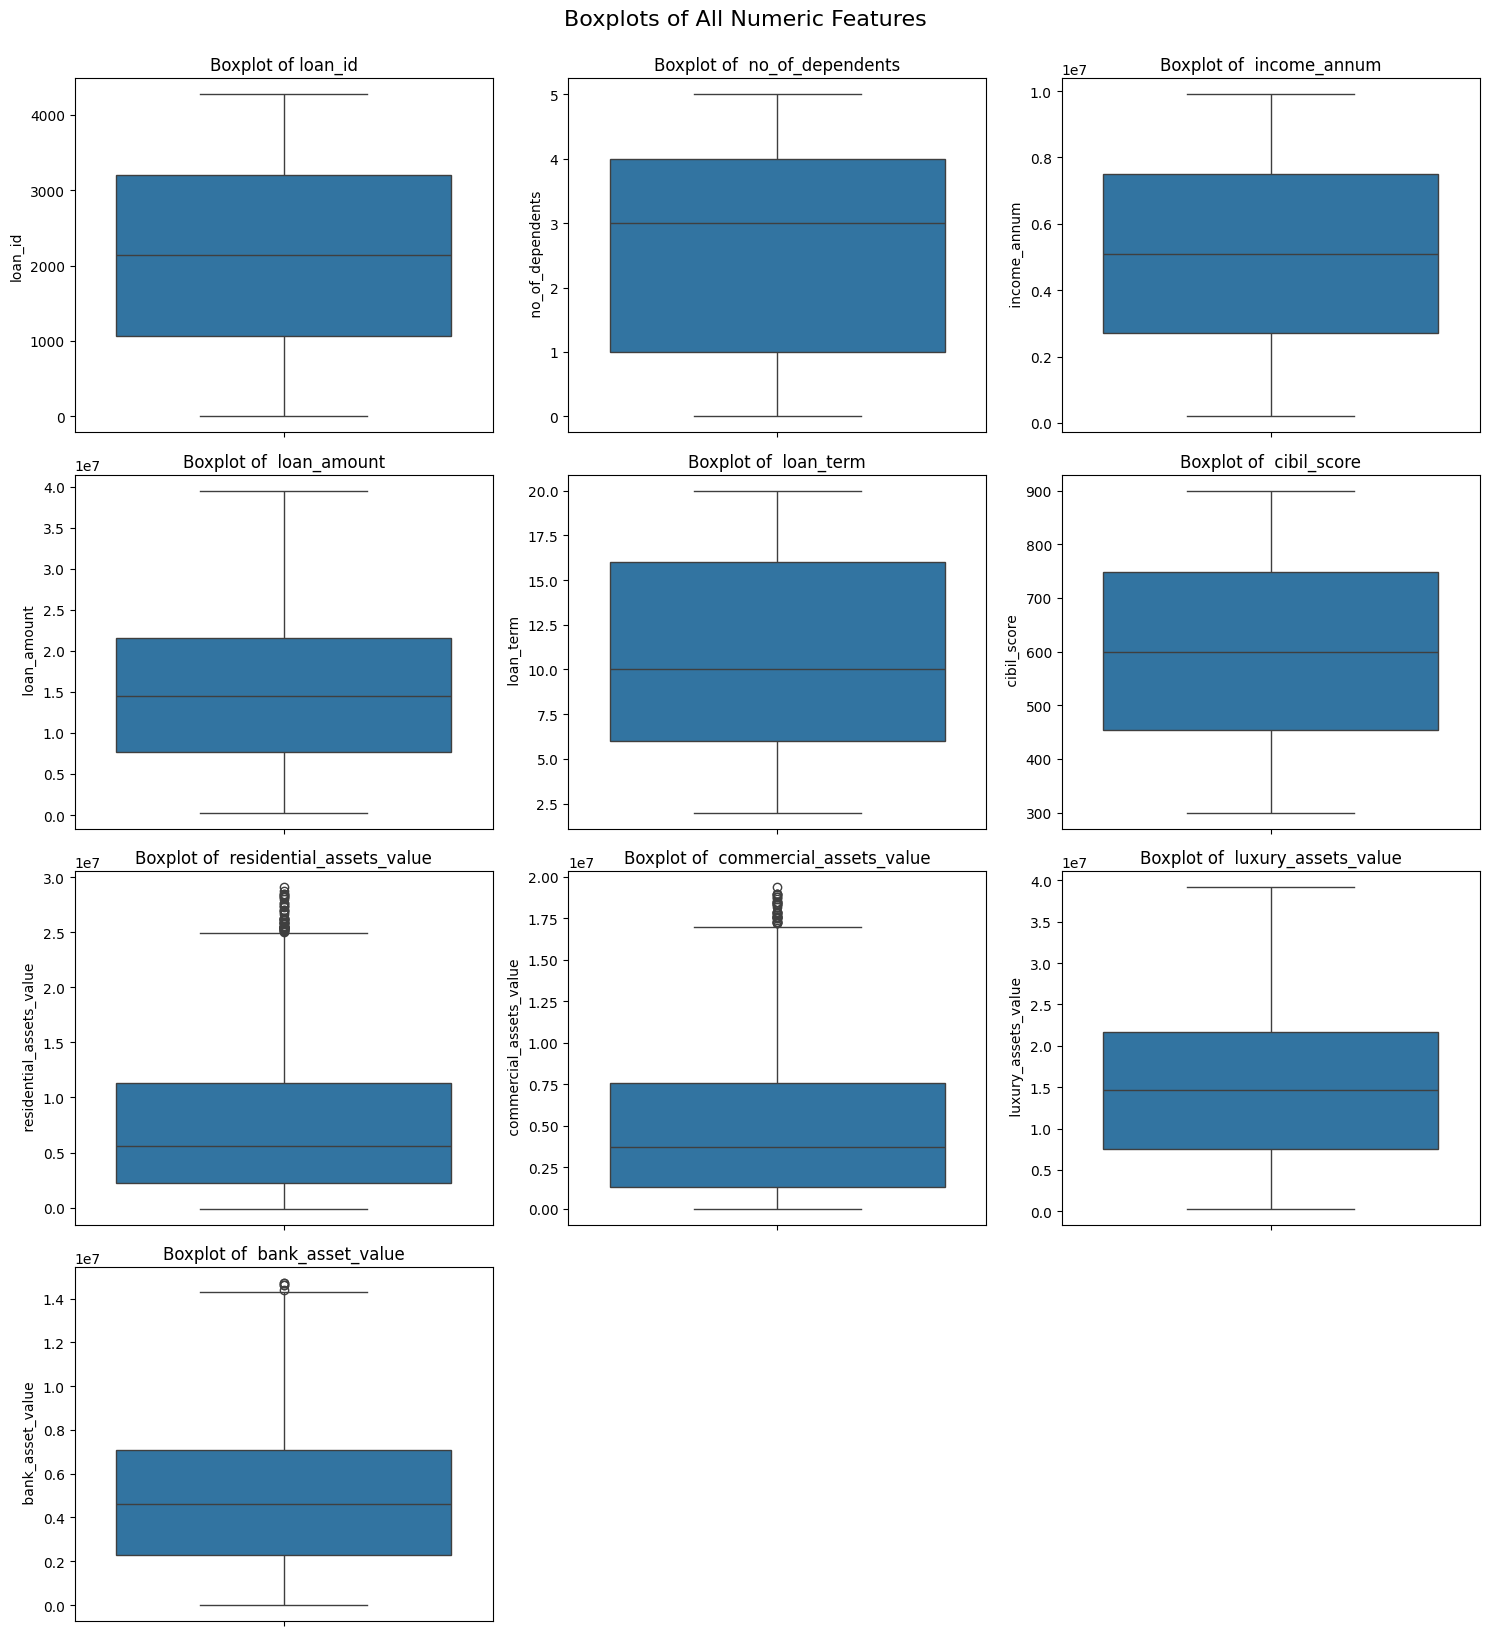

In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Boxplots of All Numeric Features", fontsize=16, y=1.02)
plt.show()

In [20]:
cat_col = [' education',' self_employed',' loan_status']

for column in cat_col:
    df[column] = label.fit_transform(df[column])

In [21]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


5. Split Data into Features and Target

In [22]:
X = df.drop(columns=' loan_status')
y = df[' loan_status']

In [23]:
X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


6. Split Data into Train and Test Sets

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=42)

In [25]:
X_train.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,1676,5,1,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,1165,0,1,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,193,1,0,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,911,2,0,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,568,5,0,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000


In [26]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (3415, 12)
y_train shape =  (3415,)
X_test shape =  (854, 12)
y_test shape =  (854,)


7.Modeling

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-0.38682838,  1.51250774,  1.00263891, ...,  2.04678575,
         0.07808278,  1.16041374],
       [-0.80430304, -1.43500078,  1.00263891, ...,  1.22311091,
         2.49843196,  0.88201987],
       [-1.59840356, -0.84549907, -0.99736803, ..., -0.8818359 ,
        -1.33923881, -1.31419838],
       ...,
       [ 0.7708264 ,  0.92300603,  1.00263891, ...,  1.29175048,
         1.47359943,  0.13963624],
       [ 1.32636998, -0.25599737,  1.00263891, ..., -0.83607619,
         0.50327926,  1.4388076 ],
       [-1.0526637 ,  0.92300603, -0.99736803, ..., -0.28695963,
         1.03750048, -0.10782497]])

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred_log = log_model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



<Axes: >

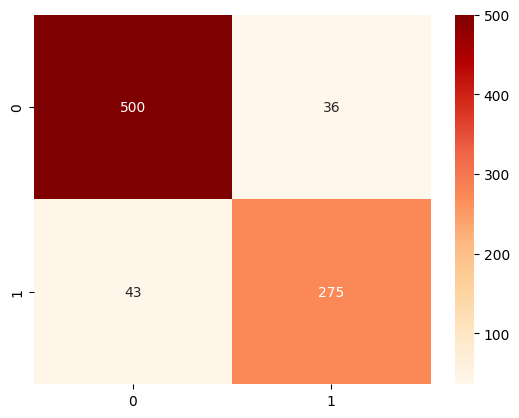

In [35]:
log_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(log_matrix, annot=True, fmt='d',cmap='OrRd', cbar=True)

In [36]:
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

print(f"Precision: {log_precision:.2f}")
print(f"Recall:    {log_recall:.2f}")
print(f"F1 Score:  {log_f1:.2f}")

Precision: 0.88
Recall:    0.86
F1 Score:  0.87


In [37]:
svm_model = SVC()

In [38]:
svm_model.fit(X_train,y_train)

SVC()

In [39]:
y_pred_svm = svm_model.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       536
           1       0.90      0.93      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



<Axes: >

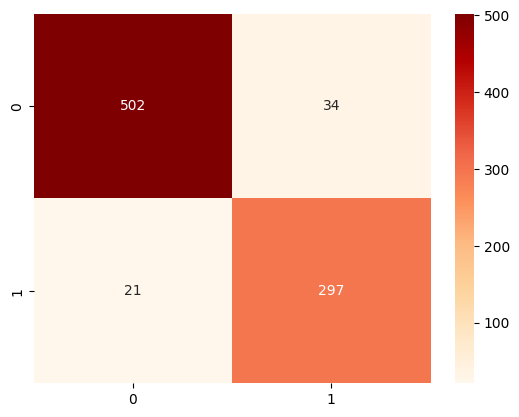

In [41]:
svm_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [42]:
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print(f"Precision: {svm_precision:.2f}")
print(f"Recall:    {svm_recall:.2f}")
print(f"F1 Score:  {svm_f1:.2f}")

Precision: 0.90
Recall:    0.93
F1 Score:  0.92


In [43]:
tree_model = DecisionTreeClassifier()

In [44]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_tree = tree_model.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



<Axes: >

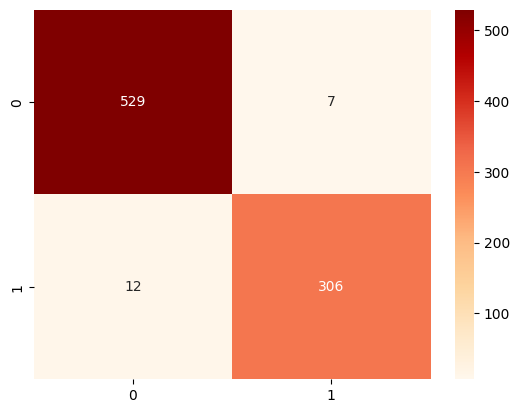

In [47]:
matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(matrix_tree, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [48]:
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

print(f"Precision: {tree_precision:.2f}")
print(f"Recall:    {tree_recall:.2f}")
print(f"F1 Score:  {tree_f1:.2f}")

Precision: 0.98
Recall:    0.96
F1 Score:  0.97


8. Compare performance

In [49]:
print("📊 Model Performance Comparison:\n")

print("🔹 Logistic Regression:")
print(f"  Precision = {log_precision:.4f}")
print(f"  Recall    = {log_recall:.4f}")
print(f"  F1-Score  = {log_f1:.4f}")

print("\n🔹 Support Vector Machine (SVM):")
print(f"  Precision = {svm_precision:.4f}")
print(f"  Recall    = {svm_recall:.4f}")
print(f"  F1-Score  = {svm_f1:.4f}")

print("\n🔹 Decision Tree:")
print(f"  Precision = {tree_precision:.4f}")
print(f"  Recall    = {tree_recall:.4f}")
print(f"  F1-Score  = {tree_f1:.4f}")

📊 Model Performance Comparison:

🔹 Logistic Regression:
  Precision = 0.8842
  Recall    = 0.8648
  F1-Score  = 0.8744

🔹 Support Vector Machine (SVM):
  Precision = 0.8973
  Recall    = 0.9340
  F1-Score  = 0.9153

🔹 Decision Tree:
  Precision = 0.9776
  Recall    = 0.9623
  F1-Score  = 0.9699


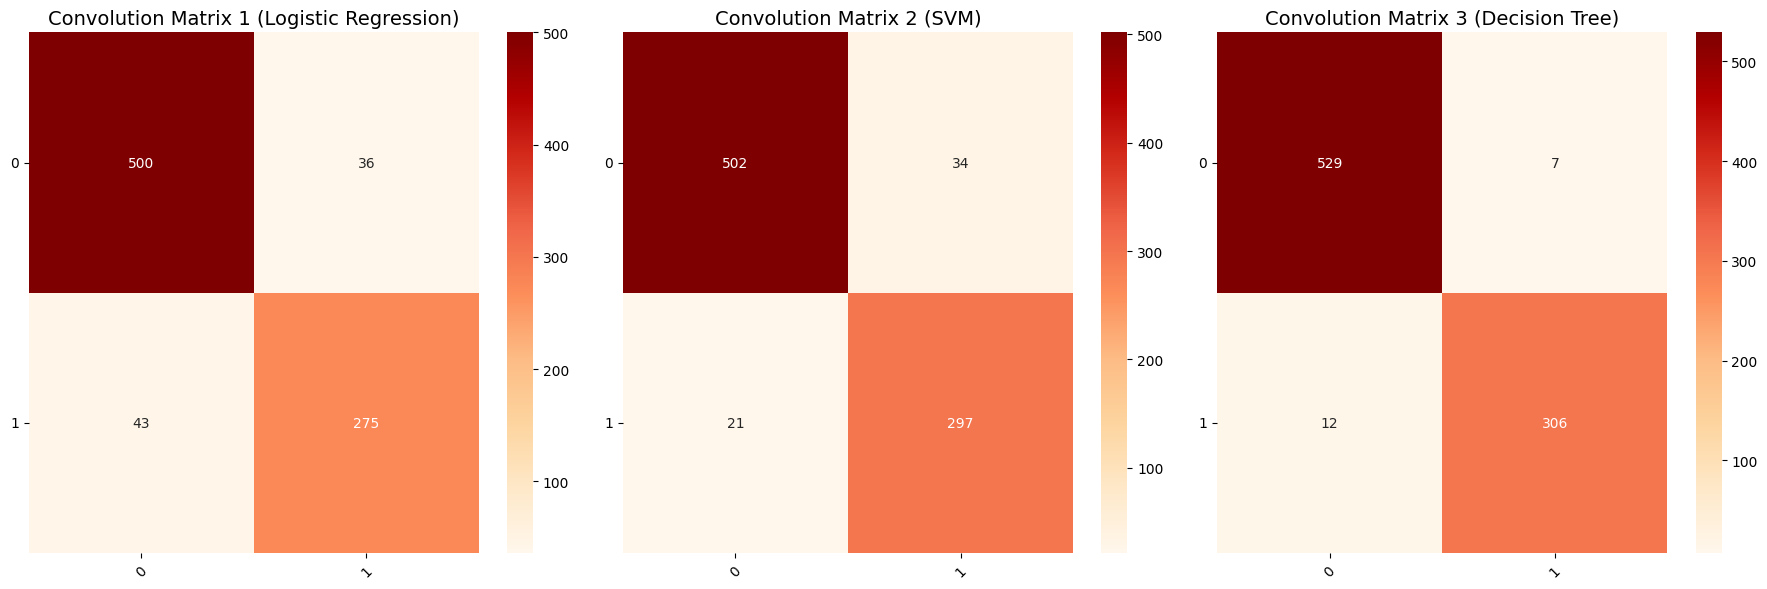

In [50]:
plt.figure(figsize=(18, 6))

# Heatmap 1
plt.subplot(1, 3, 1)
sns.heatmap(log_matrix, cmap='OrRd', annot=True, fmt="d", cbar=True,
            xticklabels=True, yticklabels=True)
plt.title('Convolution Matrix 1 (Logistic Regression)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Heatmap 2
plt.subplot(1, 3, 2)
sns.heatmap(svm_matrix, cmap='OrRd', annot=True, fmt="d", cbar=True,
            xticklabels=True, yticklabels=True)
plt.title('Convolution Matrix 2 (SVM)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Heatmap 3
plt.subplot(1, 3, 3)
sns.heatmap(matrix_tree, cmap='OrRd', annot=True, fmt="d", cbar=True,
            xticklabels=True, yticklabels=True)
plt.title('Convolution Matrix 3 (Decision Tree)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()
